In [1]:
from pathlib import Path

import polars as pl
import hvplot.polars

In [2]:
data_dir = Path("../data/raw/")

train_df = pl.read_parquet(data_dir / "train_interactions.parquet")
train_df.sample(3)

user_id,item_id,timespent,like,dislike,share,bookmarks
u32,u32,u8,u8,u8,u8,u8
66356,166663,4,0,0,0,0
20757,219204,41,0,0,0,0
114251,3055,2,0,0,0,0


In [3]:
train_df.describe()

describe,user_id,item_id,timespent,like,dislike,share,bookmarks
str,f64,f64,f64,f64,f64,f64,f64
"""count""",1.45667282e8,1.45667282e8,1.45667282e8,1.45667282e8,1.45667282e8,1.45667282e8,1.45667282e8
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",91459.706068,171930.6424,20.725152,0.046601,0.000393,0.010798,0.000986
"""std""",52720.587338,97417.790409,23.134567,0.210783,0.019823,0.10335,0.031382
"""min""",0.0,0.0,1.0,0.0,0.0,0.0,0.0
"""25%""",45984.0,88571.0,4.0,0.0,0.0,0.0,0.0
"""50%""",90883.0,173393.0,15.0,0.0,0.0,0.0,0.0
"""75%""",137123.0,255384.0,28.0,0.0,0.0,0.0,0.0
"""max""",183403.0,337726.0,255.0,1.0,1.0,1.0,1.0


# Кол-во пользователей/item

In [4]:
(
    train_df
    .select(
        pl.col("user_id").n_unique(),
        pl.col("item_id").n_unique(),
    )
)

user_id,item_id
u32,u32
183404,337727


## Распределение кол-ва взаимодействованных item по юзерам

<Axes: ylabel='Frequency'>

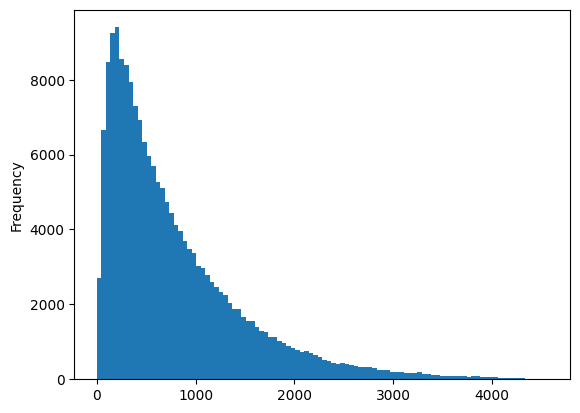

In [5]:
(
    train_df
    .group_by("user_id")
    .agg(
        pl.col("item_id").n_unique().alias("items_per_user"),
    )
    .select("items_per_user")
    .to_pandas()
    ["items_per_user"]
    .plot.hist(bins=100)
)

<Axes: ylabel='Frequency'>

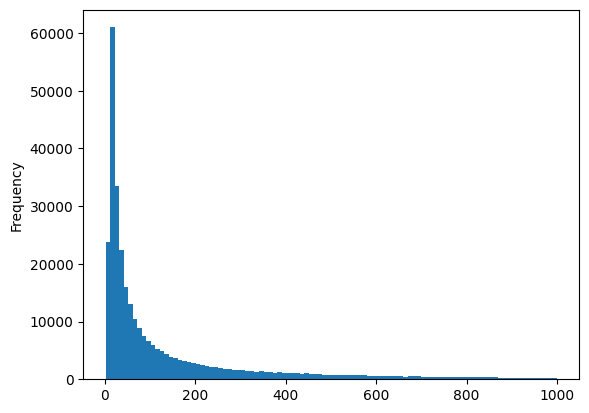

In [6]:
(
    train_df
    .group_by("item_id")
    .agg(
        pl.col("user_id").n_unique().alias("users_per_item"),
    )
    .select("users_per_item")
    .filter(pl.col("users_per_item") < 1000)
    .to_pandas()
    ["users_per_item"]
    .plot.hist(bins=100)
)

<Axes: ylabel='Frequency'>

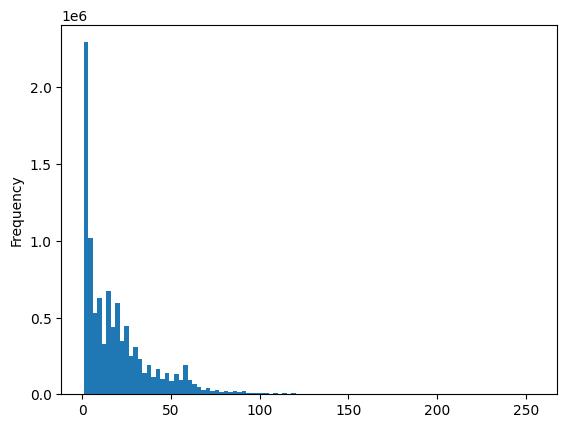

In [7]:
(
    train_df
    .sample(10_000_000)
    .select(pl.col("timespent"))
    .to_pandas()
    ["timespent"]
    .plot.hist(bins=100)
)

<Axes: xlabel='timespent_bin'>

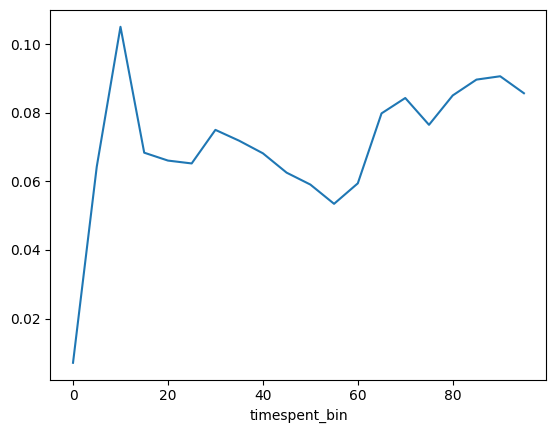

In [8]:
(
    train_df
    .sample(1_000_000)
    .filter(pl.col("timespent") < 100)
    .with_columns(
        (pl.col("like") | pl.col("dislike") | pl.col("share")).alias("any_target")
    )
    .group_by(
        ((pl.col("timespent") // 5) * 5).alias("timespent_bin")
    )
    .agg(
        pl.col("any_target").mean()
    )
    .sort("timespent_bin")
    .to_pandas()
    .set_index("timespent_bin")
    .any_target.plot.line()
)

# Meta

In [9]:
items_meta_df = pl.read_parquet("../data/raw/items_meta.parquet")
users_meta_df = pl.read_parquet("../data/raw/users_meta.parquet")

In [11]:
items_meta_df.head(3)

item_id,source_id,duration,embeddings
u32,u32,u8,"array[f32, 32]"
0,1869,13,"[0.076078, 0.243124, … 0.007498]"
1,1869,8,"[-0.289725, 0.01622, … 0.004202]"
2,1869,10,"[-0.084795, 0.163596, … 0.116369]"


In [13]:
users_meta_df.head(3)

user_id,gender,age
u32,u8,u8
0,2,35
1,2,35
2,1,38


In [14]:
train_df

user_id,item_id,timespent,like,dislike,share,bookmarks
u32,u32,u8,u8,u8,u8,u8
3810,138979,6,0,0,0,0
101874,331160,6,0,0,0,0
150332,73709,11,0,0,0,0
4982,189745,5,0,0,0,0
149601,289643,1,0,0,1,0
24973,336570,5,0,0,0,0
102774,171404,2,0,0,0,0
104618,186769,14,0,0,0,0
25103,43776,2,0,0,0,0


# Нет ли в тестовых парах айтемов или пользователей, которые не взаимодействовали

In [3]:
train_df.head(3)

user_id,item_id,timespent,like,dislike,share,bookmarks
u32,u32,u8,u8,u8,u8,u8
3810,138979,6,0,0,0,0
101874,331160,6,0,0,0,0
150332,73709,11,0,0,0,0


In [4]:
test_pairs = pl.read_csv(data_dir / "test_pairs.csv.csv")
test_pairs

user_id,item_id
i64,i64
1,7363
1,73770
1,75700
1,81204
1,110249
1,126228
1,126552
1,183944
1,194870


In [6]:
len(set(test_pairs["user_id"].unique()).intersection(train_df["user_id"].unique())) / len(set(test_pairs["user_id"].unique()).union(train_df["user_id"].unique()))

0.4512224378966653

In [8]:
len(set(test_pairs["item_id"].unique()).intersection(train_df["item_id"].unique())) / len(set(test_pairs["item_id"].unique()))

1.0